K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification Problems.

K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg

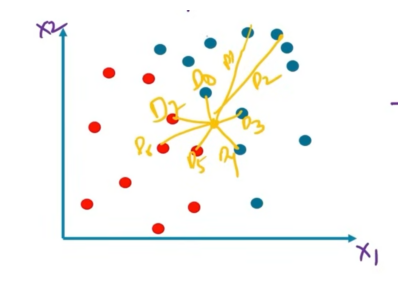

In [2]:
plt.figure(figsize=(5, 4))
img = mpimg.imread('Image/K-nearest.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
# K-Nearest Neighbors (KNN) – Simple Explanation

# 1. KNN is a machine learning algorithm used for both classification and regression.
#    But mostly people use it for classification.

# 2. KNN does NOT learn any formula or model.
#    It is called a "lazy learner" because it just stores all the training data.

# 3. When we want to predict for a new point:
#       → KNN looks at the 'K' closest neighbors from the training data.
#       → 'K' means how many neighbors we check (like 3, 5, 7 etc.)

# 4. To find closeness, KNN uses distance formulas:
#       → Mostly Euclidean distance (normal distance between 2 points)

# 5. For classification (Yes/No, Cat/Dog):
#       → KNN checks the labels of the K nearest points.
#       → Whichever label appears more times, that becomes our prediction.
#       Example: If K = 5 and neighbors = [Dog, Cat, Dog, Dog, Cat]
#                Dog appears more → Prediction = Dog

# 6. For regression (predict numbers):
#       → KNN takes the average of the K nearest neighbors.

# 7. KNN works well when:
#       → Data is small
#       → Features are on similar scale (so we usually apply StandardScaler)

# 8. KNN becomes slow when dataset is large because it checks distance from every point.

# 9. Important hyperparameter:
#       → K value
#       → If K is too small → model becomes noisy
#       → If K is too large → model becomes too generalized

# 10. Summary:
#        - KNN stores data
#        - Finds nearest neighbors
#        - Majority vote = classification output
#        - Average = regression output


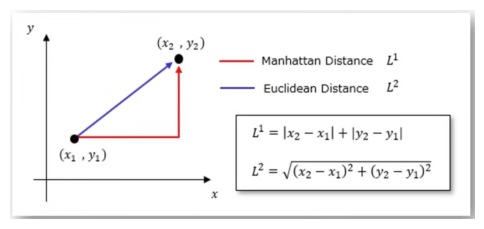

In [4]:
plt.figure(figsize=(6, 5))
img = mpimg.imread('Image/how can find.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# Second one is Become by pythagoras -- ac2 = ab2 + bc2
# at class we give p = 1 then use First method
# at class we give p = 2 then use Second method

In [6]:
df = pd.read_csv('../Dataset/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


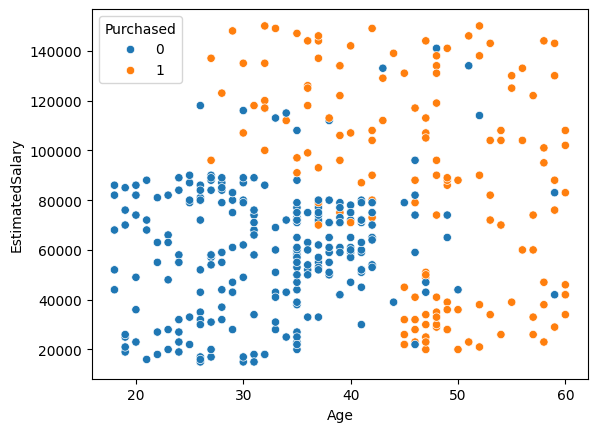

In [8]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data=df, hue='Purchased')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
new = pd.DataFrame(sc.transform(x), columns=x.columns)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNC = KNeighborsClassifier(n_neighbors = 7, p = 2)

In [13]:
KNC.fit(x_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
KNC.score(x_test, y_test)*100

93.75

In [15]:
KNC.score(x_train, y_train)*100

91.875

In [16]:
# Let's find best value so Our model not goes to Overfiting 
# First we use p = 1 method and then we use Pythagorean theorem

In [17]:
for i in range(1, 10):
    KNC = KNeighborsClassifier(n_neighbors = i, p = 1)
    KNC.fit(x_train, y_train)
    print(f'Train Score: {KNC.score(x_train, y_train)*100}, Test Score: {KNC.score(x_test, y_test)*100}, i used :{i}, train - test = {(KNC.score(x_train, y_train)*100) - KNC.score(x_test, y_test)*100}')

Train Score: 99.6875, Test Score: 83.75, i used :1, train - test = 15.9375
Train Score: 91.875, Test Score: 86.25, i used :2, train - test = 5.625
Train Score: 91.5625, Test Score: 91.25, i used :3, train - test = 0.3125
Train Score: 92.1875, Test Score: 92.5, i used :4, train - test = -0.3125
Train Score: 91.25, Test Score: 92.5, i used :5, train - test = -1.25
Train Score: 90.9375, Test Score: 91.25, i used :6, train - test = -0.3125
Train Score: 91.25, Test Score: 92.5, i used :7, train - test = -1.25
Train Score: 90.0, Test Score: 92.5, i used :8, train - test = -2.5
Train Score: 90.9375, Test Score: 93.75, i used :9, train - test = -2.8125


In [18]:
# now use Pythagorean theorem

In [19]:
for i in range(1, 10):
    KNC = KNeighborsClassifier(n_neighbors = i, p = 2)
    KNC.fit(x_train, y_train)
    print(f'Train Score: {KNC.score(x_train, y_train)*100}, Test Score: {KNC.score(x_test, y_test)*100}, i used :{i}, train - test = {(KNC.score(x_train, y_train)*100) - KNC.score(x_test, y_test)*100}')

Train Score: 99.6875, Test Score: 85.0, i used :1, train - test = 14.6875
Train Score: 91.5625, Test Score: 86.25, i used :2, train - test = 5.3125
Train Score: 92.5, Test Score: 91.25, i used :3, train - test = 1.25
Train Score: 91.875, Test Score: 92.5, i used :4, train - test = -0.625
Train Score: 90.9375, Test Score: 92.5, i used :5, train - test = -1.5625
Train Score: 90.9375, Test Score: 90.0, i used :6, train - test = 0.9375
Train Score: 91.875, Test Score: 93.75, i used :7, train - test = -1.875
Train Score: 90.625, Test Score: 92.5, i used :8, train - test = -1.875
Train Score: 91.25, Test Score: 93.75, i used :9, train - test = -2.5


In [20]:
# on this data we can say n_neighbors = 3 or 4 is best for us with p = 1, so let's create model on 3.

In [21]:
KNC = KNeighborsClassifier(n_neighbors = 3, p = 1)
KNC.fit(x_train, y_train)
print(KNC.score(x_train, y_train)*100)
print(KNC.score(x_test, y_test)*100)

91.5625
91.25


In [22]:
# so here is the best output without Overfiting

In [23]:
# Let's check Decision Bountry

In [24]:
from mlxtend.plotting import plot_decision_regions

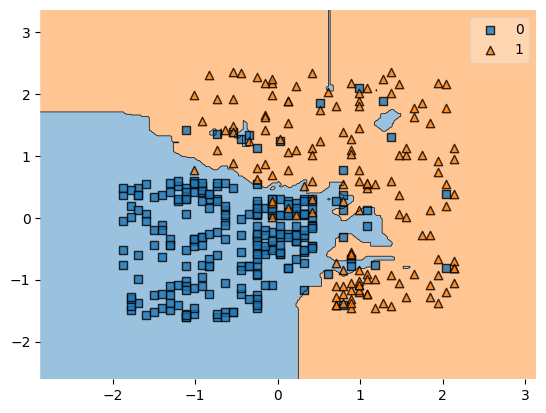

In [25]:
plot_decision_regions(new.to_numpy(), y.to_numpy().flatten(), clf=KNC)
plt.show()